In [1]:
import scipy

In [1]:
from spt3g import core
import matplotlib.pyplot as plt
import numpy as np


In [3]:
file = core.G3File("test.g3")
s = core.G3Units.s

ts = []
ts1 = []
timestamps = []

for frame in file:
    x = frame["filtered"]["0"]
    ts.append(frame["filtered"]["0"])
    ts1.append(frame["filtered"]["1"])
    timestamps.append(np.linspace(x.start.time / s, x.stop.time/s, x.n_samples))


t0 = timestamps[0][0]
plt.plot(np.concatenate(timestamps),np.concatenate(ts) / 1218, color='C0', label = "Channel 0")
plt.plot(np.concatenate(timestamps),np.concatenate(ts1) / 1218, color='C1', label = "Channel 1")

plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Phase (rad)")

plt.show()

KeyError: "Key 'filtered' not found"

In [33]:
file = core.G3File("comparison.g3")
s = core.G3Units.s

ts_uf = []
ts_f = []
timestamps = []

for frame in file:
    x = frame["filtered"]["0"]
    ts_f.append(x)
    timestamps.append(np.linspace(x.start.time/s, x.stop.time/s, x.n_samples))
    x = frame["unfiltered"]["0"]
    ts_uf.append(x)


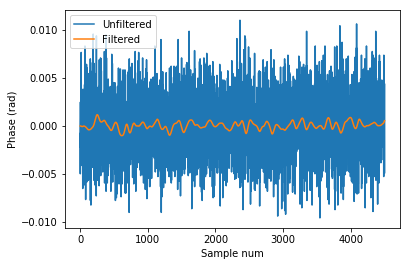

In [34]:
plt.plot(np.concatenate(ts_uf), label = "Unfiltered")
plt.plot(np.concatenate(ts_f) / 1218, label = "Filtered")
plt.legend()
plt.xlabel("Sample num")
plt.ylabel("Phase (rad)")
plt.show()

Text(0,0.5,'Filtered PSD / unfiltered PSD')

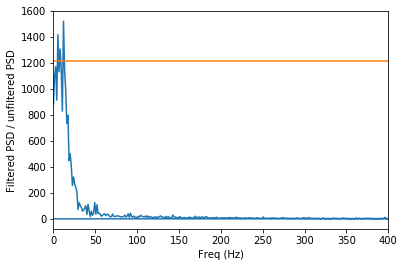

In [40]:
# Calculates FFT's

fs_uf = np.array([abs(np.fft.fft(x))**2 for x in ts_uf])
fs_f = np.array([abs(np.fft.fft(x))**2 for x in ts_f])

f_uf = np.sqrt(sum(fs_uf) / len(fs_uf))
f_f = np.sqrt(sum(fs_f) / len(fs_f))

xs = np.fft.fftfreq(len(f_f), d=1/ts_f[0].sample_rate / core.G3Units.s)

plt.plot(xs, f_f/f_uf)
plt.axhline(y = 1218, color="C1")
plt.xlim(0, 400)
plt.xlabel("Freq (Hz)")
plt.ylabel("Filtered PSD / unfiltered PSD")

In [4]:
file = core.G3File('test.g3')
ts = []
timestamps = []
for frame in file:
    x = frame['phases']['0']
    ts.append(x)
    timestamps.append(np.linspace(x.start.time / s, x.stop.time/s, x.n_samples))



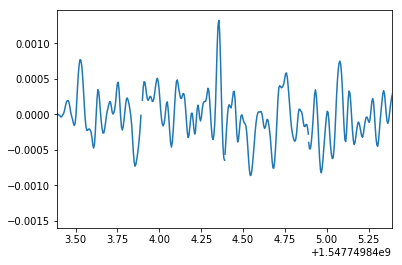

In [6]:
t0 = timestamps[0][0]
for i in range(len(timestamps)):
    plt.plot(timestamps[i], ts[i]/1218, color='C0')
plt.xlim(t0,t0 + 2)
plt.show()